In [1]:
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import matplotlib as plt

In [2]:
geolocator = Nominatim(user_agent="D7-project")
location = geolocator.geocode("1081-1083 Dorchester Ave, 02125")
print((location.latitude, location.longitude))

(42.3099718, -71.0578954)


In [9]:
# Load the shapefile
shapefile = gpd.read_file("../data/Boston_Precinct_Boundaries")
# Check the CRS
print(shapefile.crs)

EPSG:3857


In [17]:
address_point = Point(location.longitude, location.latitude)
address_gdf = gpd.GeoDataFrame(geometry=[address_point], crs="EPSG:4326")
address_gdf = address_gdf.to_crs(shapefile.crs)

<Axes: >

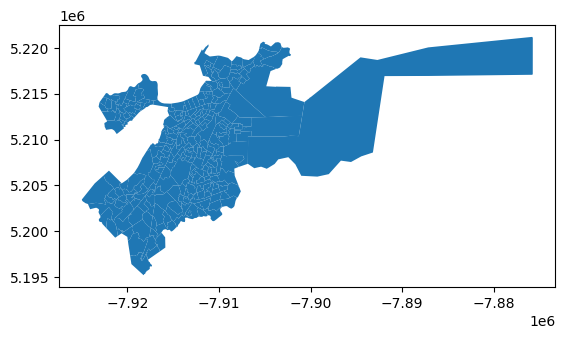

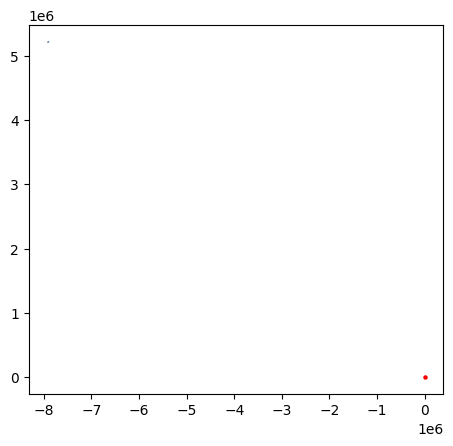

In [18]:
shapefile.plot()
address_gdf.plot(ax=shapefile.plot(), color='red', markersize=5)

In [16]:
# Perform the spatial join
result = gpd.sjoin(address_gdf, shapefile, how="left", predicate="intersects")
result

,geometry,index_right,DISTRICT,WDPCT,Ward1,Precinct1,State_WDPC,Gov_Coun_2,Rep_2022,Senate_202,Congress_2,Shape_Leng,Shape_Area
0,POINT (-7910128.733 5207525.404),159,15-06,1506,15,06,15-06,4th,13th,1st,7.0,4696.90206,710629.919734
